In [1]:
import numpy as np
import pandas as pd

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## READ THE data
advertising = pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

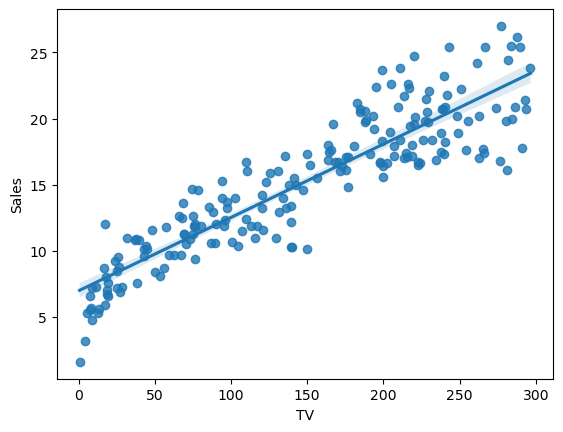

In [9]:
## visualize the data
sns.regplot(x='TV',y='Sales',data=advertising)

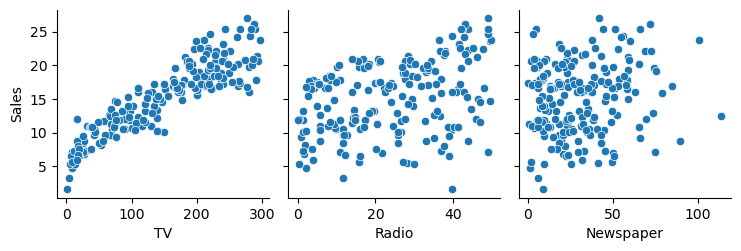

In [10]:
### Pairplot
sns.pairplot(data=advertising,
            x_vars=['TV','Radio','Newspaper'],
            y_vars = 'Sales')

In [11]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

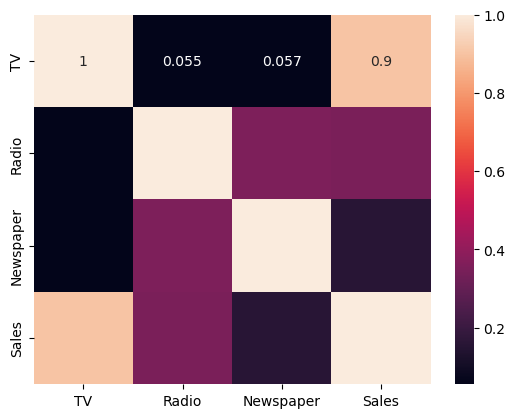

In [12]:
sns.heatmap(advertising.corr(),annot=True)

### PERFORMING SIMPLE LINEAR REGRESSION

In [14]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [15]:
## create X and Y
X = advertising['TV']
y = advertising['Sales']

In [16]:
## train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [17]:
## training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [18]:
## fit the model
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

- This means Sales = 6.94+0.054*TV

In [19]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 14 May 2024   Prob (F-statistic):           1.52e-52
Time:                        14:47:20   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- p value is very low
- R2 is very high
- Prob f statistic is very low

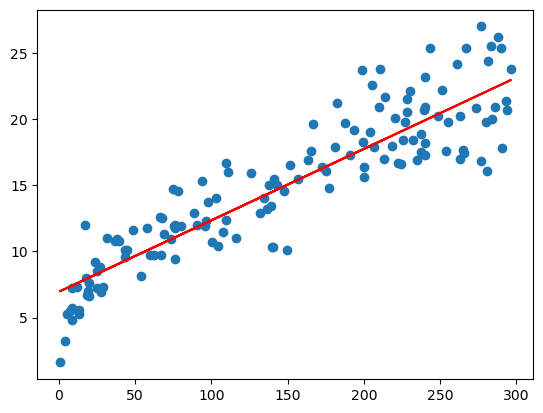

In [23]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948+0.054*X_train,'red')
plt.show()

In [25]:
## Prediction
y_train_pred = lr_model.predict(X_train_sm)

### RESIDUAL ANALYSIS

In [26]:
res = y_train - y_train_pred

C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Residual Plot')

<Figure size 640x480 with 0 Axes>

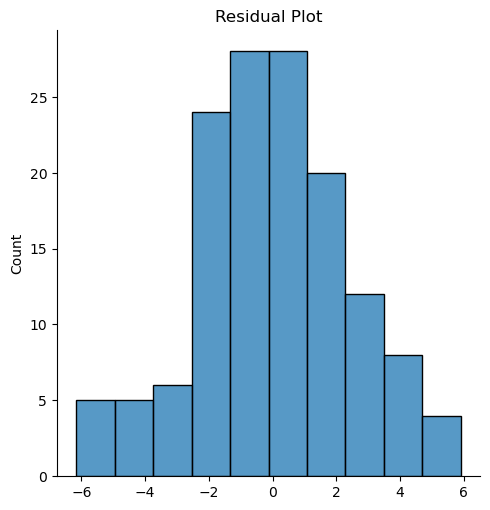

In [30]:
# plot the residuals
plt.figure()
sns.displot(res)
plt.title('Residual Plot')

- Residual is normally distributed

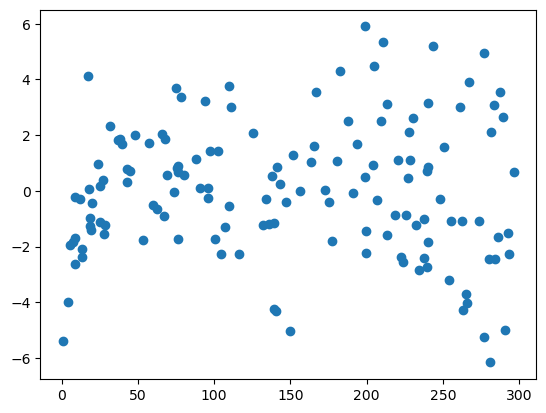

In [32]:
## Look for patterns in residuals
plt.scatter(X_train,res)
plt.show()

### PREDICTIONS AND EVALUATIONS ON THE TEST SET

In [33]:
X_test_sm= sm.add_constant(X_test)
#pred on test set
y_test_pred = lr_model.predict(X_test_sm)

In [34]:
## evaluating the model
from sklearn.metrics import mean_squared_error,r2_score

In [35]:
r2 = r2_score(y_test,y_test_pred)
r2

0.7921031601245659

In [36]:
## mean squared error
mean_squared_error(y_test,y_test_pred)

4.077556371826953

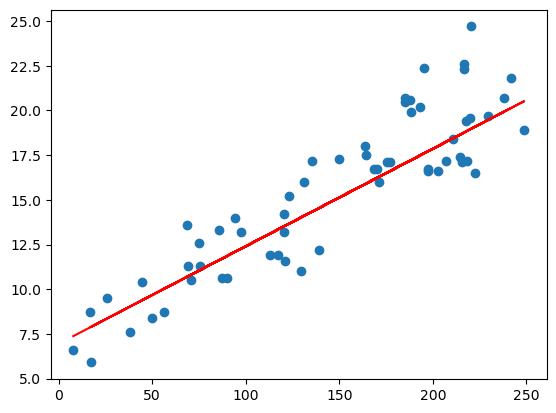

In [39]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()

## LINEAR REGRESSION USING SKLEARN

In [40]:
from sklearn.linear_model import LinearRegression

In [44]:
## reshaping X_train to (n,1)
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [46]:
X_train.shape,X_train_lm.shape

((140,), (140, 1))

In [48]:
lm = LinearRegression()
lm.fit(X_train_lm,y_train)

LinearRegression()

In [49]:
## coefficient
lm.coef_

array([0.05454575])

In [50]:
## intercept
lm.intercept_

6.948683200001357

In [51]:
## Making predictions
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [53]:
## evaluate the model
print(r2_score(y_test,y_test_pred))
r2_score(y_train,y_train_pred)

0.7921031601245662


0.8157933136480389

# HOUSING CASE STUDY

### READING AND UNDERSTANDING THE DATA


In [300]:
housing = pd.read_csv('housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [301]:
housing.shape

(545, 13)

In [302]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [303]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

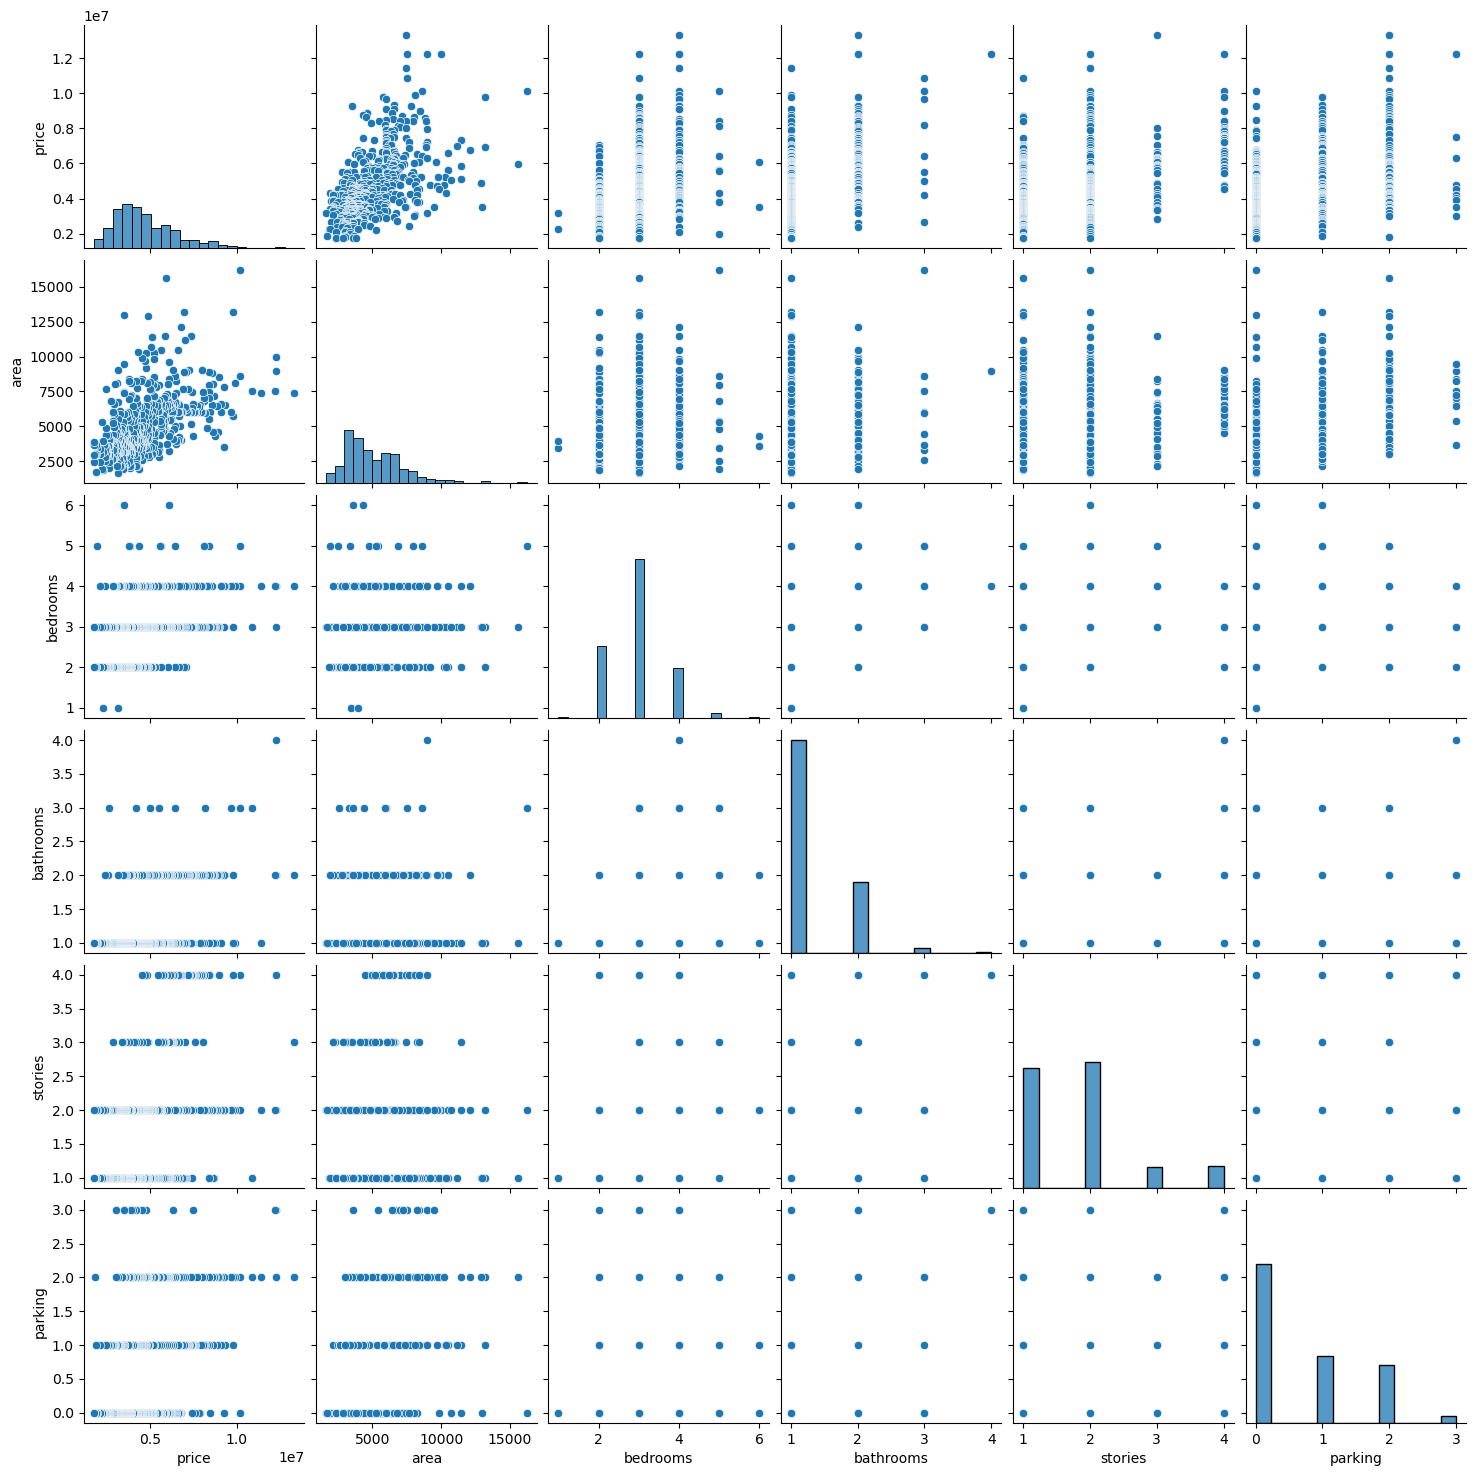

In [304]:
#Visualising
sns.pairplot(housing)
plt.show()

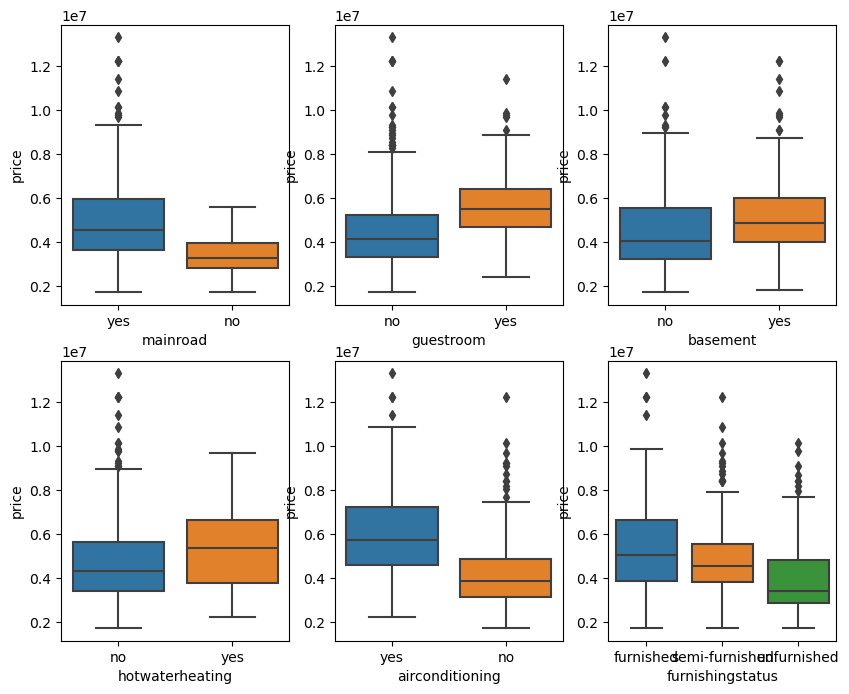

In [305]:
#visualizing the categorical variables
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad',y='price',data=housing)
plt.subplot(2,3,2)
sns.boxplot(x='guestroom',y='price',data=housing)
plt.subplot(2,3,3)
sns.boxplot(x='basement',y='price',data=housing)
plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating',y='price',data=housing)
plt.subplot(2,3,5)
sns.boxplot(x='airconditioning',y='price',data=housing)
plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus',y='price',data=housing)
plt.show()

### PREPARING THE DATA FOR MODELLING
- Converting binary variables to 1/0
- Other categorical variables to dummy vars

In [306]:
housing.mainroad.value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [307]:
#yes/no variables
varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
housing[varlist] = housing[varlist].apply(lambda x:x.map({'yes':1,'no':0}))
housing[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


### DUMMY VARIABLES

In [308]:
## creating dummy vars for furnishing status
status = pd.get_dummies(housing['furnishingstatus'],dtype=int,drop_first=True)
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [309]:
## concating the dummy df with the original one
housing = pd.concat([housing,status],axis=1)
housing.drop('furnishingstatus',axis=1,inplace=True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


### Splitting into train and test set

In [310]:
df_train,df_test = train_test_split(housing,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


### SCALING THE FEATURES

In [311]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['area','bedrooms','bathrooms','stories','parking','price']

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


### TRAINING THE MODEL

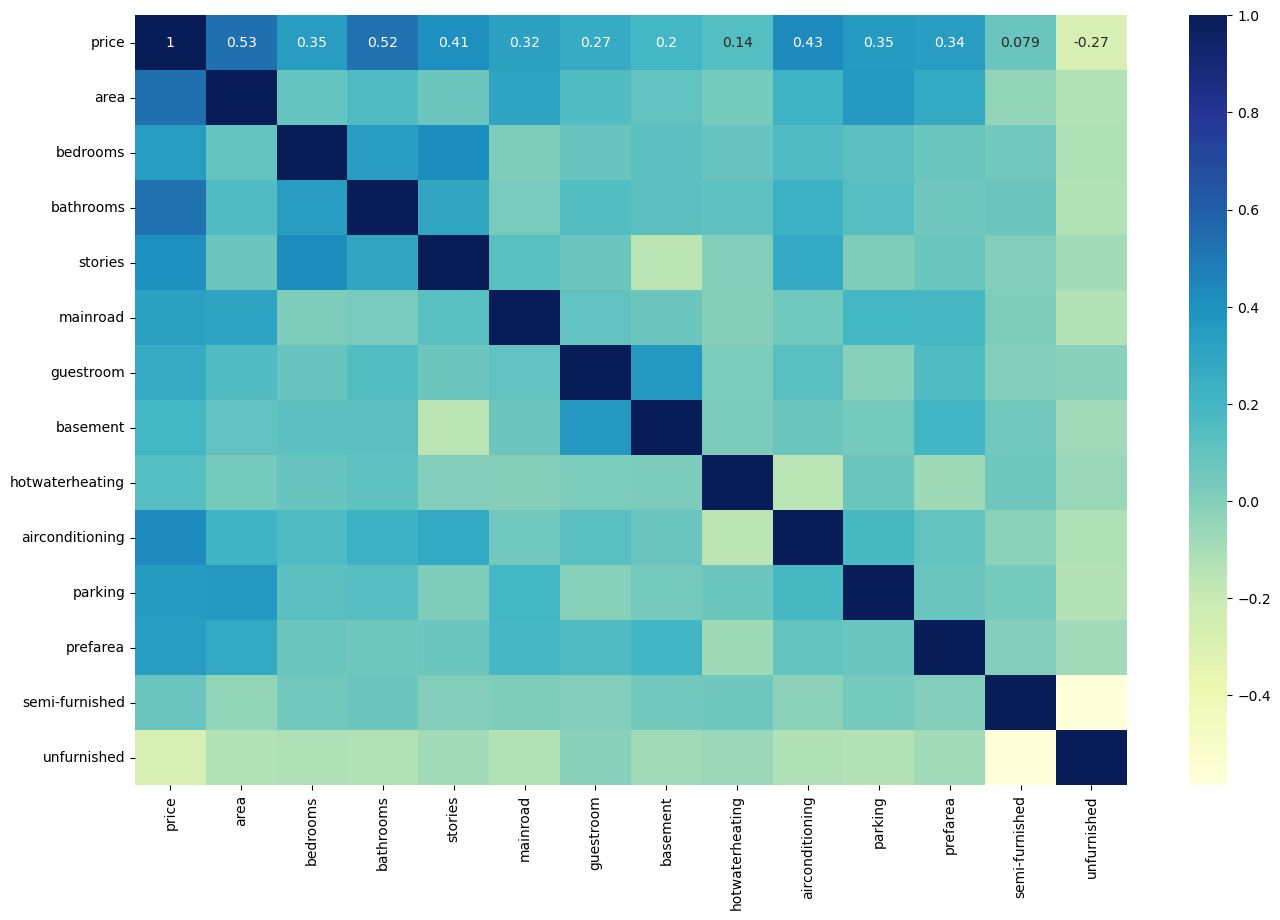

In [312]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [313]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [314]:
#X_train, y_train
y_train = df_train.pop('price')
X_train = df_train

In [315]:
## add a constant
X_train_sm  =sm.add_constant(X_train['area'])

# create the first model
lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()
lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [316]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Tue, 14 May 2024   Prob (F-statistic):           3.15e-29
Time:                        17:59:15   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [317]:
## add another variable bathrooms
X_train_sm = X_train[['area','bathrooms']]
X_train_sm  =sm.add_constant(X_train_sm)

# create the first model
lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()
lr_model.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [318]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Tue, 14 May 2024   Prob (F-statistic):           2.51e-54
Time:                        17:59:15   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ADDING ALL VARIABLE TO THE MODEL

In [319]:
## builing the model with all the variables
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Tue, 14 May 2024   Prob (F-statistic):           8.83e-83
Time:                        17:59:15   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### CHECKING VIF

In [320]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [321]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [round(variance_inflation_factor(X_train.values,i),2) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


In [322]:
X = X_train.drop('semi-furnished',axis=1)

In [323]:
# create another model
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Tue, 14 May 2024   Prob (F-statistic):           1.07e-83
Time:                        17:59:16   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [324]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [round(variance_inflation_factor(X.values,i),2) for i in range(X.shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [325]:
X =X.drop('bedrooms',axis=1)

In [326]:
# create another model
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Tue, 14 May 2024   Prob (F-statistic):           2.73e-84
Time:                        17:59:17   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [327]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [round(variance_inflation_factor(X.values,i),2) for i in range(X.shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


#### RESIDUAL ANALYSIS AND PREDICTIONS

In [328]:
y_train_pred = lr_model.predict(X_train_sm)

In [329]:
res = y_train - y_train_pred

C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


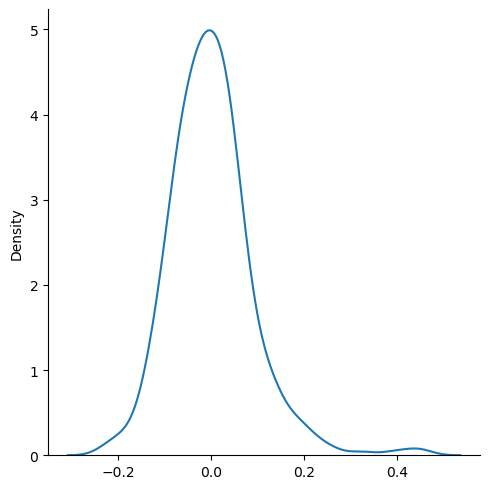

In [330]:
sns.displot(res,kind='kde')

### PREDICTIONS AND EVALUATIONS ON THE TEST SET

In [331]:
## creating list of numeric vars
num_vars = ['area','bedrooms','bathrooms','stories','parking','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [332]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [333]:
y_test = df_test['price']
X_test = df_test.drop('price',axis=1)

In [334]:
## add a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [335]:
X_test_sm = X_test_sm.drop(['bedrooms','semi-furnished'],axis=1)

In [336]:
#predict
y_test_pred = lr_model.predict(X_test_sm)

In [337]:
#evaluate
r2_score(y_true=y_test,y_pred=y_test_pred)

0.6713505684480789

### VARIABLE SELECTION USING RFE

In [338]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [339]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm,n_features_to_select=10)
rfe = rfe.fit(X_train,y_train)

In [340]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [341]:
col  = X_train.columns[rfe.support_]
col

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [342]:
X_train.columns[~rfe.support_]

Index(['basement', 'semi-furnished', 'unfurnished'], dtype='object')

### Building model using statsmodels for detailed statistics

In [343]:
X_train_rfe = X_train[col]

In [344]:
import statsmodels.api as ms
X_train_rfe = sm.add_constant(X_train_rfe)

In [345]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [346]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Tue, 14 May 2024   Prob (F-statistic):           1.28e-82
Time:                        18:00:23   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018     

In [352]:
new_cols  = X_train_rfe.columns.drop('const')
X_train_new = X_train_rfe[new_cols]

In [353]:
# adding a constant variable
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_new.values,i),2) for i in range(X_train_new.shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,bedrooms,5.85
4,mainroad,5.53
0,area,4.66
3,stories,2.45
8,parking,2.11
7,airconditioning,1.75
2,bathrooms,1.64
9,prefarea,1.47
5,guestroom,1.30
6,hotwaterheating,1.13


### RESIDUAL ANALYSIS ON THE TRAIN DATA

In [354]:
y_train_price = lm.predict(X_train_rfe)

C:\Users\Prince\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

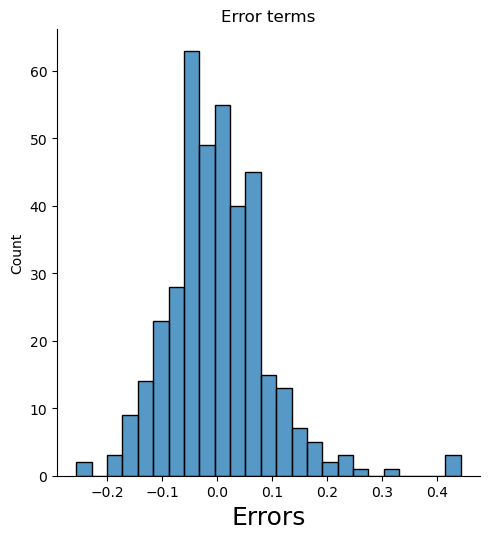

In [355]:
fig = plt.figure()
sns.displot(y_train - y_train_price)
plt.title('Error terms')
plt.xlabel('Errors',fontsize=18)

### MAKING PREDICTIONS

In [356]:
num_vars = ['area','bedrooms','bathrooms','stories','parking','price']
df_test[num_vars]  = scaler.transform(df_test[num_vars])

In [357]:
## dividing into X_test, and y_test
y_test = df_test['price']
X_test = df_test[X_train_rfe.columns.drop('const')]

In [358]:
X_test_sm  = sm.add_constant(X_test)

In [359]:
y_pred = lm.predict(X_test_sm)

### MODEL EVALUATION

Text(0, 0.5, 'y_pred')

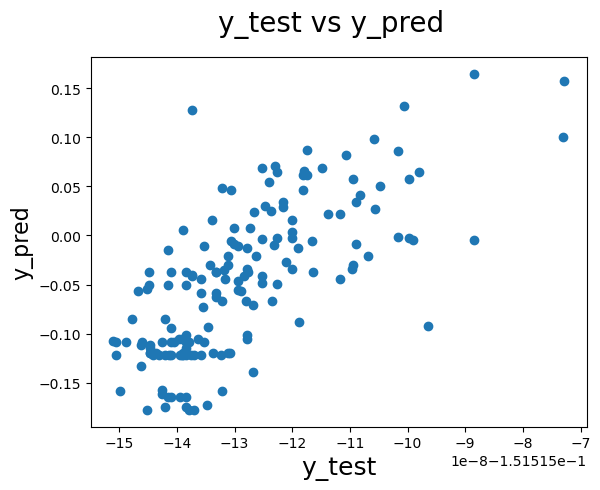

In [361]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=16)

### RIDGE REGRESSION

In [362]:
from sklearn.linear_model import Ridge, Lasso

In [363]:
# dataframe
data = {'Marketing Spend':[23,26,30,34,43,48],
        'Sales':[651,762,856,1063,1190,1298]
    
}
data = pd.DataFrame(data)
data.head()

,Marketing Spend,Sales
0,23,651
1,26,762
2,30,856
3,34,1063
4,43,1190


<Axes: xlabel='Marketing Spend', ylabel='Sales'>

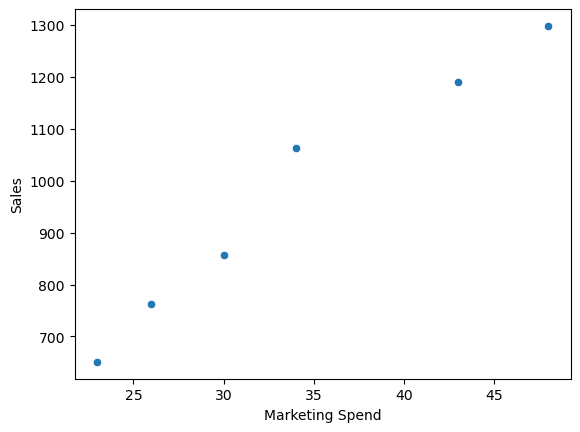

In [364]:
##plotting the scatterplot
sns.scatterplot(data=data,x='Marketing Spend',y='Sales')

In [365]:
# Scaling the data between 0 and 1
scaler = MinMaxScaler()
data[['Marketing Spend','Sales']]=scaler.fit_transform(data[['Marketing Spend','Sales']])

In [366]:
data

,Marketing Spend,Sales
0,0.00,0.000000
1,0.12,0.171561
2,0.28,0.316847
3,0.44,0.636785
4,0.80,0.833076
5,1.00,1.000000


<Axes: xlabel='Marketing Spend', ylabel='Sales'>

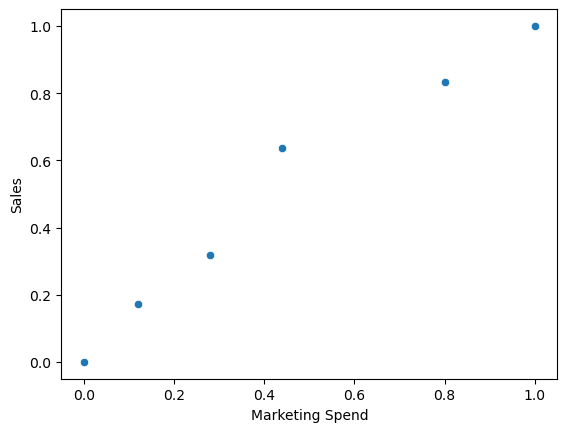

In [367]:
##plotting the scatterplot
sns.scatterplot(data=data,x='Marketing Spend',y='Sales')

In [369]:
#Splitting the data
X  = data['Marketing Spend'].values.reshape(-1,1)
y = data['Sales']

In [370]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [371]:
y_pred = reg.predict(X)
y_pred

array([0.05907859, 0.17743302, 0.33523892, 0.49304482, 0.8481081 ,
       1.04536548])

In [372]:
r2_score(y,y_pred)

0.9652190930694494

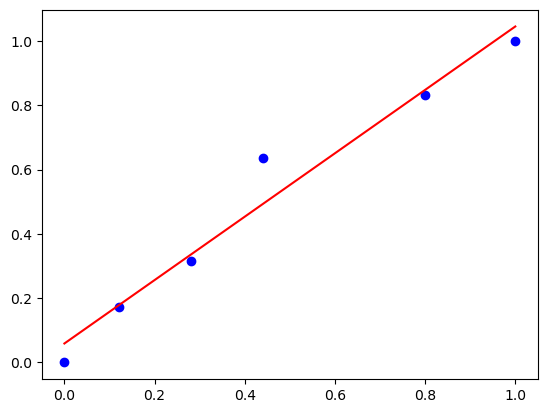

In [373]:
## Plot for predicted sales vs marketing spend
plt.scatter(X,y,color='blue')
plt.plot(X,y_pred,color='red')
plt.show()

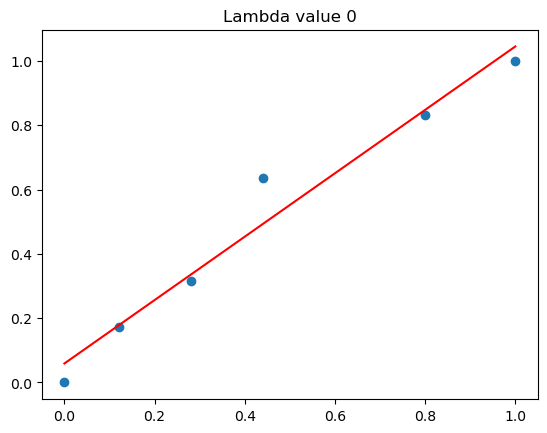

{'r2': '0.97', 'Coeff': array([0.98628689]), 'Intercept': 0.05907859253846215}


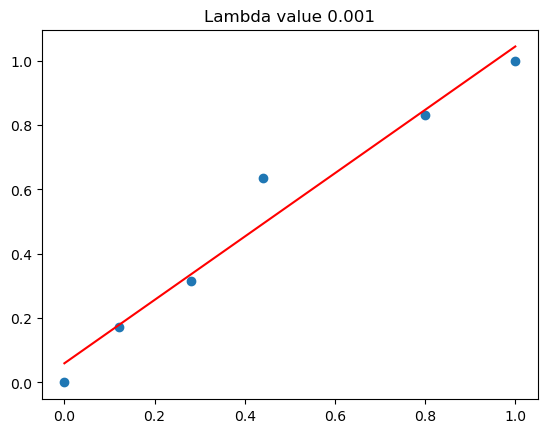

{'r2': '0.97', 'Coeff': array([0.98499897]), 'Intercept': 0.05964527604553721}


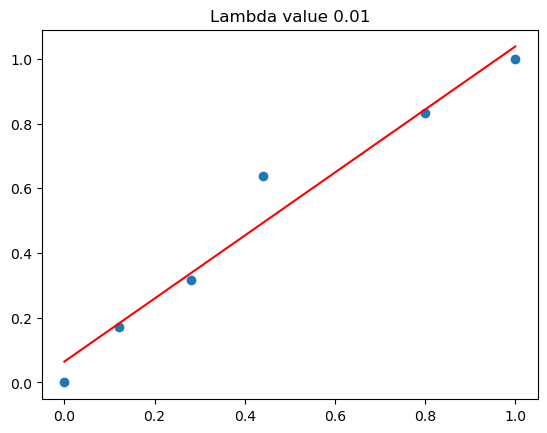

{'r2': '0.97', 'Coeff': array([0.97355732]), 'Intercept': 0.06467960221474128}


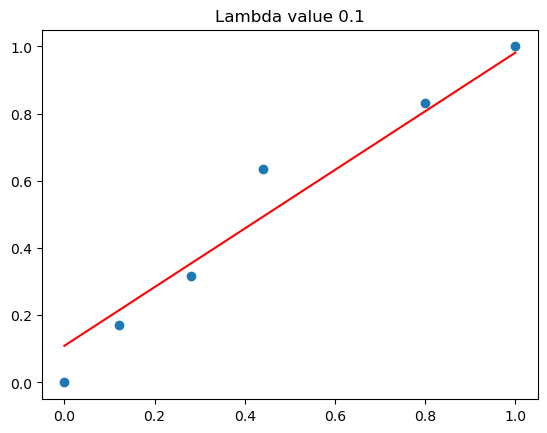

{'r2': '0.95', 'Coeff': array([0.87223891]), 'Intercept': 0.10925970143278535}


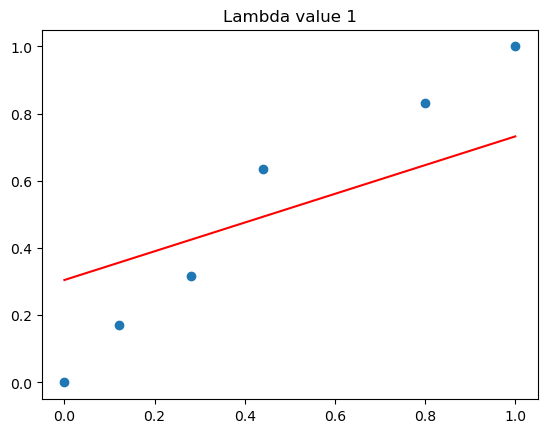

{'r2': '0.66', 'Coeff': array([0.42742079]), 'Intercept': 0.30497967465434317}


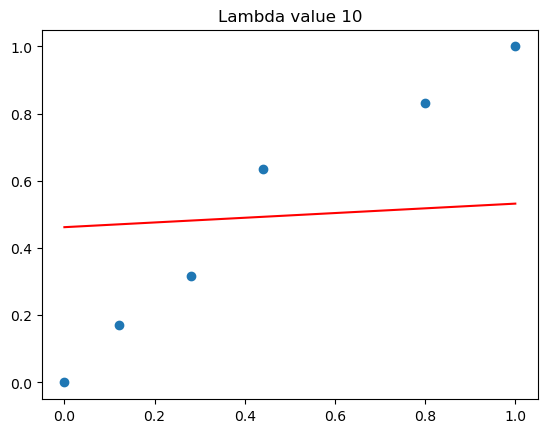

{'r2': '0.13', 'Coeff': array([0.07007211]), 'Intercept': 0.4622130954721968}


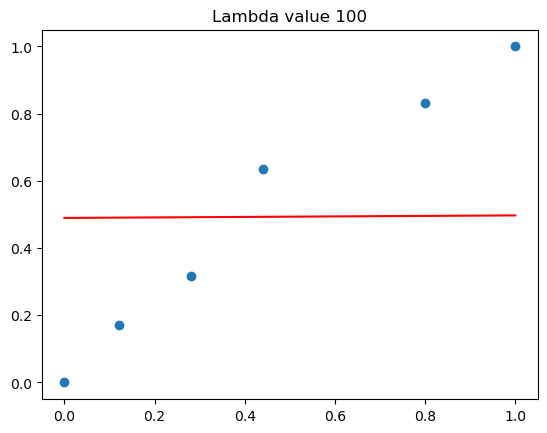

{'r2': '0.01', 'Coeff': array([0.00748587]), 'Intercept': 0.489751039383101}


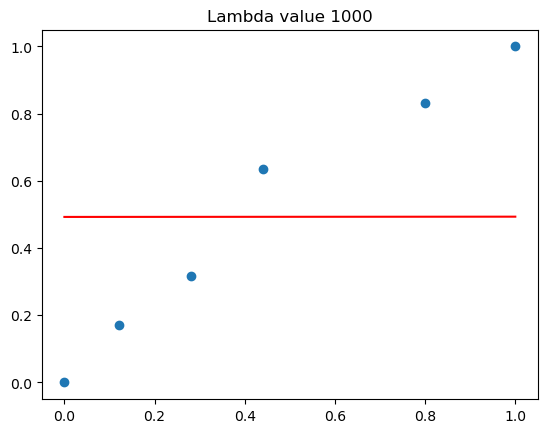

{'r2': '0.0', 'Coeff': array([0.00075374]), 'Intercept': 0.49271317852520613}


In [396]:
## Making a regression model for different values of lambda 
lambdas = [0,0.001,0.01,0.1,1,10,100,1000]
result = pd.DataFrame(columns = ['Lambda','R_coef','R_intercept','r2'])

for i in lambdas:
    ridge = Ridge(i)
    ridge.fit(X,y)
    y_pred = ridge.predict(X)
    plt.scatter(X,y)
    plt.plot(X,y_pred,'red')
    plt.title(f'Lambda value {i}')
    plt.show(block=False)
    result.loc[len(result)] = [i,ridge.coef_,ridge.intercept_,round(r2_score(y,y_pred),2)]
    print({"r2":f"{round(r2_score(y,y_pred),2)}","Coeff":ridge.coef_,"Intercept":ridge.intercept_})

In [397]:
result

,Lambda,R_coef,R_intercept,r2
0,0.000,[0.9862868857229699],0.059079,0.97
1,0.001,[0.9849989686614355],0.059645,0.97
2,0.010,[0.9735573182768809],0.064680,0.97
3,0.100,[0.8722389109631443],0.109260,0.95
4,1.000,[0.4274207900050584],0.304980,0.66
5,10.000,[0.07007210632811824],0.462213,0.13
6,100.000,[0.007485870166972267],0.489751,0.01
7,1000.000,[0.0007537357530969587],0.492713,0.00


### LASSO REGRESSION

C:\Users\Prince\AppData\Local\Temp\ipykernel_17472\1479822812.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X,y)
C:\Users\Prince\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Prince\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.340e-02, tolerance: 7.708e-05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


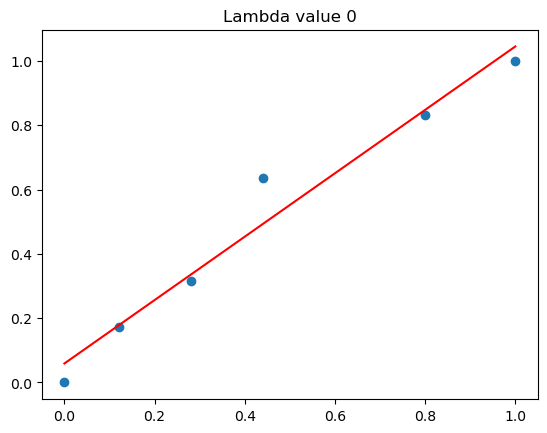

{'r2': '0.97', 'Coeff': array([0.00075374]), 'Intercept': 0.49271317852520613}


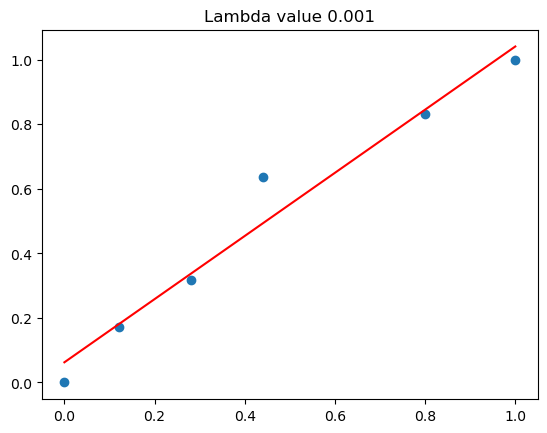

{'r2': '0.97', 'Coeff': array([0.00075374]), 'Intercept': 0.49271317852520613}


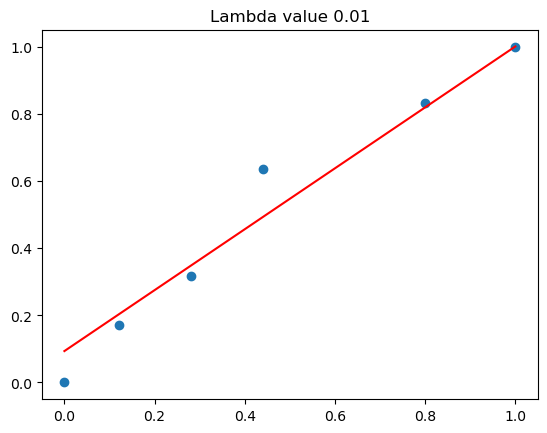

{'r2': '0.96', 'Coeff': array([0.00075374]), 'Intercept': 0.49271317852520613}


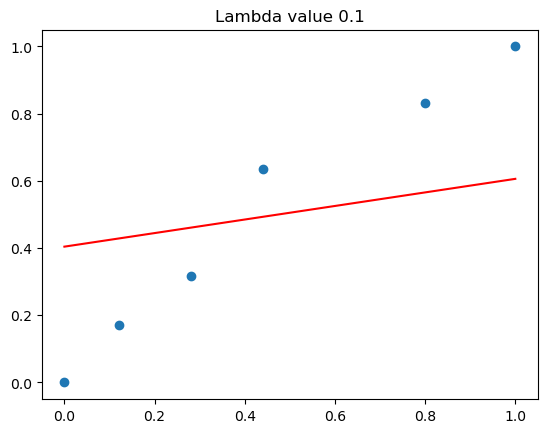

{'r2': '0.35', 'Coeff': array([0.00075374]), 'Intercept': 0.49271317852520613}


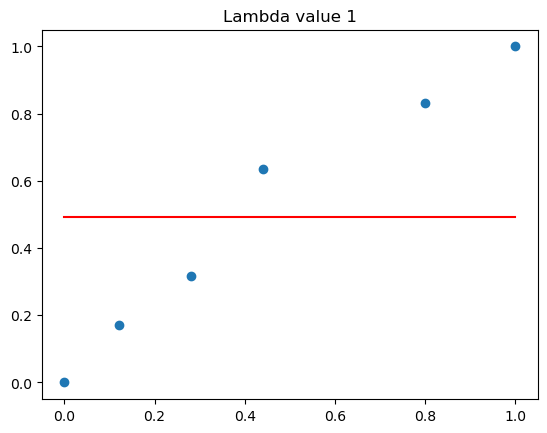

{'r2': '0.0', 'Coeff': array([0.00075374]), 'Intercept': 0.49271317852520613}


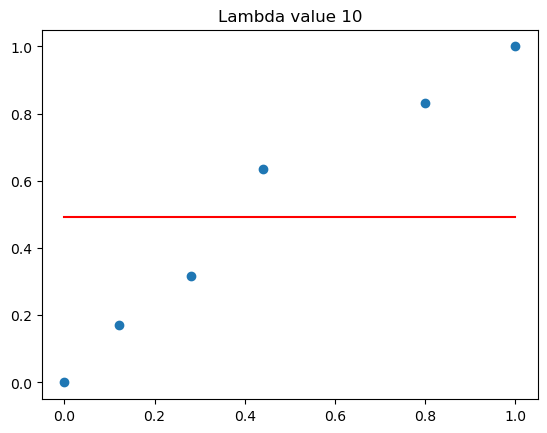

{'r2': '0.0', 'Coeff': array([0.00075374]), 'Intercept': 0.49271317852520613}


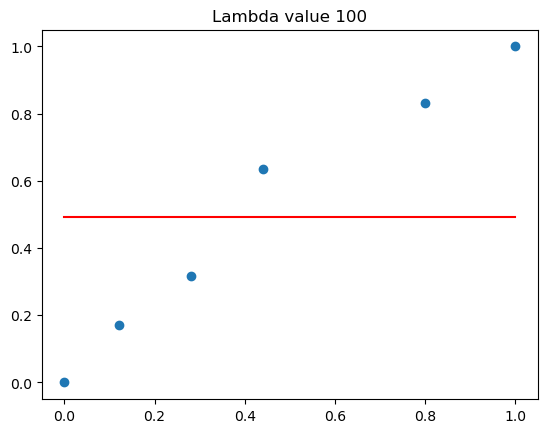

{'r2': '0.0', 'Coeff': array([0.00075374]), 'Intercept': 0.49271317852520613}


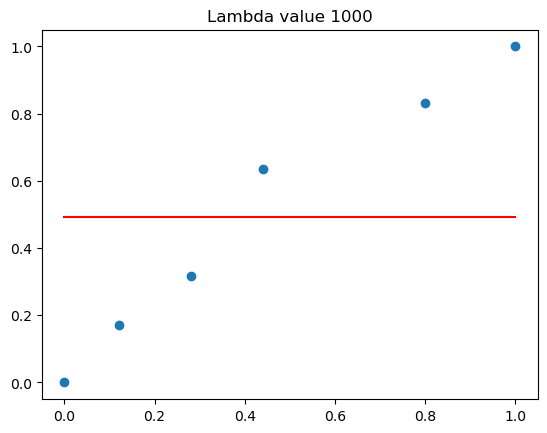

{'r2': '0.0', 'Coeff': array([0.00075374]), 'Intercept': 0.49271317852520613}


In [399]:
## Making a regression model for different values of lambda 
lambdas = [0,0.001,0.01,0.1,1,10,100,1000]
result = pd.DataFrame(columns = ['Lambda','L_coef','L_intercept','r2'])

for i in lambdas:
    lasso = Lasso(i)
    lasso.fit(X,y)
    y_pred = lasso.predict(X)
    plt.scatter(X,y)
    plt.plot(X,y_pred,'red')
    plt.title(f'Lambda value {i}')
    plt.show(block=False)
    result.loc[len(result)] = [i,ridge.coef_,ridge.intercept_,round(r2_score(y,y_pred),2)]
    print({"r2":f"{round(r2_score(y,y_pred),2)}","Coeff":ridge.coef_,"Intercept":ridge.intercept_})

In [400]:
result

,Lambda,L_coef,L_intercept,r2
0,0.000,[0.0007537357530969587],0.492713,0.97
1,0.001,[0.0007537357530969587],0.492713,0.97
2,0.010,[0.0007537357530969587],0.492713,0.96
3,0.100,[0.0007537357530969587],0.492713,0.35
4,1.000,[0.0007537357530969587],0.492713,0.00
5,10.000,[0.0007537357530969587],0.492713,0.00
6,100.000,[0.0007537357530969587],0.492713,0.00
7,1000.000,[0.0007537357530969587],0.492713,0.00
